In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

In [2]:
columns = ["sex", "length", "diameter", "height", "whole_wght", "shuckled_wght", "visera_wght", "shell_wght", "age"]
df = pd.read_csv("abalone.csv", sep=",",names = columns)
df.head()
df.drop(index = [0], axis = 0, inplace = True)

In [3]:
df.reset_index(inplace = True, drop = True)
df.head()

,sex,length,diameter,height,whole_wght,shuckled_wght,visera_wght,shell_wght,age
0,M,0.455,0.365,0.095,0.514,0.2245,0.101,0.15,15
1,M,0.35,0.265,0.09,0.2255,0.0995,0.0485,0.07,7
2,F,0.53,0.42,0.135,0.677,0.2565,0.1415,0.21,9
3,M,0.44,0.365,0.125,0.516,0.2155,0.114,0.155,10
4,I,0.33,0.255,0.08,0.205,0.0895,0.0395,0.055,7


In [4]:
# df = df[["sex", "length", "height", "whole_wght", "age"]]

df['sex'] = df["sex"].map({"M":2, "F": 1, "I": 0})

In [5]:
# df["sex"] = df["sex"].astype("float")
# df[df['height'] == 0.0]  #need to drop these rows.
df.head()

,sex,length,diameter,height,whole_wght,shuckled_wght,visera_wght,shell_wght,age
0,2,0.455,0.365,0.095,0.514,0.2245,0.101,0.15,15
1,2,0.35,0.265,0.09,0.2255,0.0995,0.0485,0.07,7
2,1,0.53,0.42,0.135,0.677,0.2565,0.1415,0.21,9
3,2,0.44,0.365,0.125,0.516,0.2155,0.114,0.155,10
4,0,0.33,0.255,0.08,0.205,0.0895,0.0395,0.055,7


In [6]:
# df.drop(index=[1257,3996], inplace = True)
# df.shape

In [7]:
df["age"] = df["age"].astype("float")
df["age"] = df["age"] + 1.5 

In [8]:
df = df.astype("float")

In [9]:
numerical = [i for i in df.columns if df[i].dtype != "O"]

In [10]:
numerical

['sex',
 'length',
 'diameter',
 'height',
 'whole_wght',
 'shuckled_wght',
 'visera_wght',
 'shell_wght',
 'age']

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   sex            4177 non-null   float64
 1   length         4177 non-null   float64
 2   diameter       4177 non-null   float64
 3   height         4177 non-null   float64
 4   whole_wght     4177 non-null   float64
 5   shuckled_wght  4177 non-null   float64
 6   visera_wght    4177 non-null   float64
 7   shell_wght     4177 non-null   float64
 8   age            4177 non-null   float64
dtypes: float64(9)
memory usage: 293.8 KB


In [12]:
df.describe()

,sex,length,diameter,height,whole_wght,shuckled_wght,visera_wght,shell_wght,age
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,1.044530,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,11.433684
std,0.827815,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,2.500000
25%,0.000000,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,9.500000
50%,1.000000,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,10.500000
75%,2.000000,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,12.500000
max,2.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,30.500000


In [13]:
df[numerical].isnull().sum()

sex              0
length           0
diameter         0
height           0
whole_wght       0
shuckled_wght    0
visera_wght      0
shell_wght       0
age              0
dtype: int64

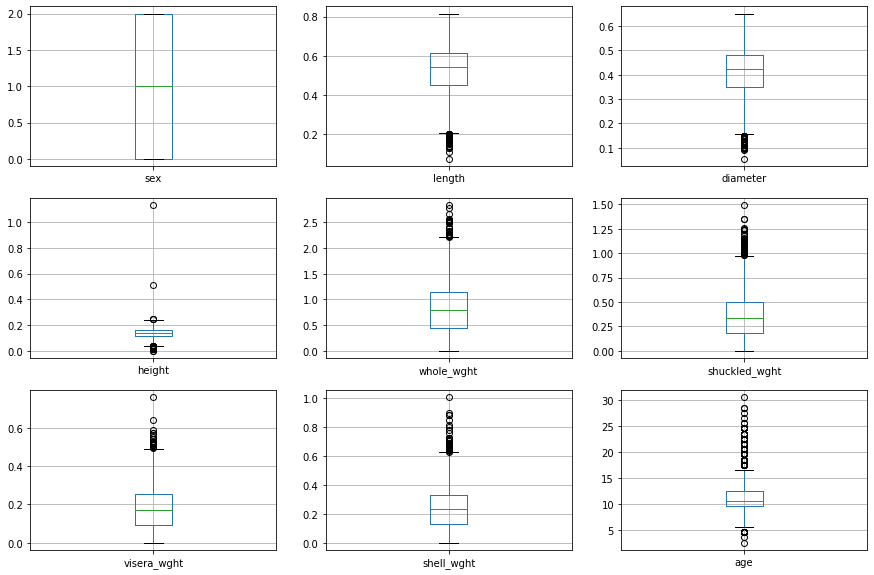

In [14]:
plt.figure(figsize = (15, 10))

for i in range(1, len(numerical)+1):
    plt.subplot(3,3,i)
    fig = df.boxplot(column = numerical[i-1])
    # fig.set_title("Pregnancies")


In [15]:
for i in range(1, len(numerical)+1):
    
    iqr = df[numerical[i-1]].quantile(0.75) - df[numerical[i-1]].quantile(0.25)
    min_val = df[numerical[i-1]].quantile(0.25) - (iqr * 1.5)
    max_val = df[numerical[i-1]].quantile(0.75) + (iqr * 1.5)
    df[numerical[i-1]] = np.where(df[numerical[i-1]] > max_val, max_val, df[numerical[i-1]])
    df[numerical[i-1]] = np.where(df[numerical[i-1]] < min_val, min_val, df[numerical[i-1]])



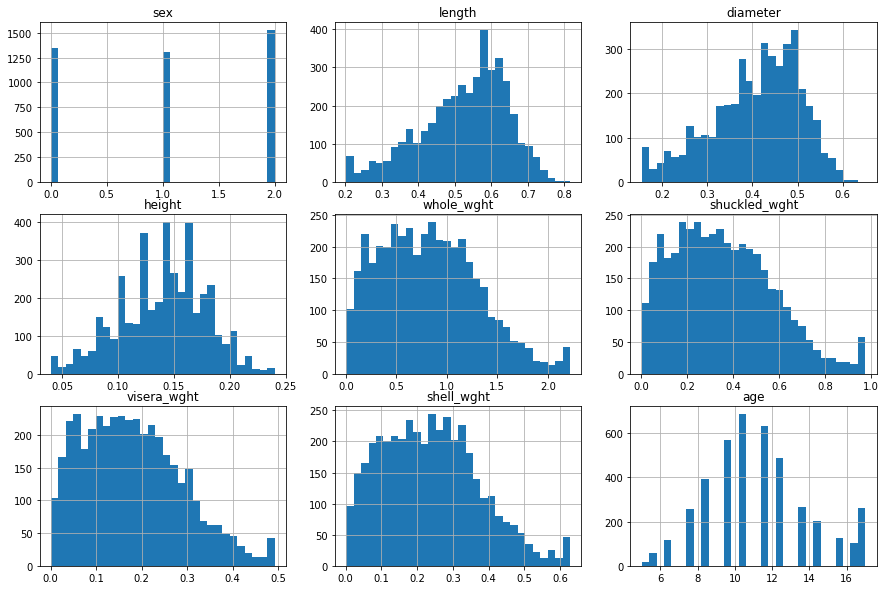

In [16]:
plt.figure(figsize = (15, 10))

for i in range(1, len(numerical)+1):
    plt.subplot(3,3,i)
    fig = df[numerical[i-1]].hist(bins = 30)
    fig.set_title(numerical[i-1])


In [17]:
# df["age"] = df["age"].astype("int")

In [18]:
x = df.drop("age", axis = 1)
y = df["age"]

In [19]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(x, y, random_state = 0)

C:\Users\Mathan\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Mathan\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


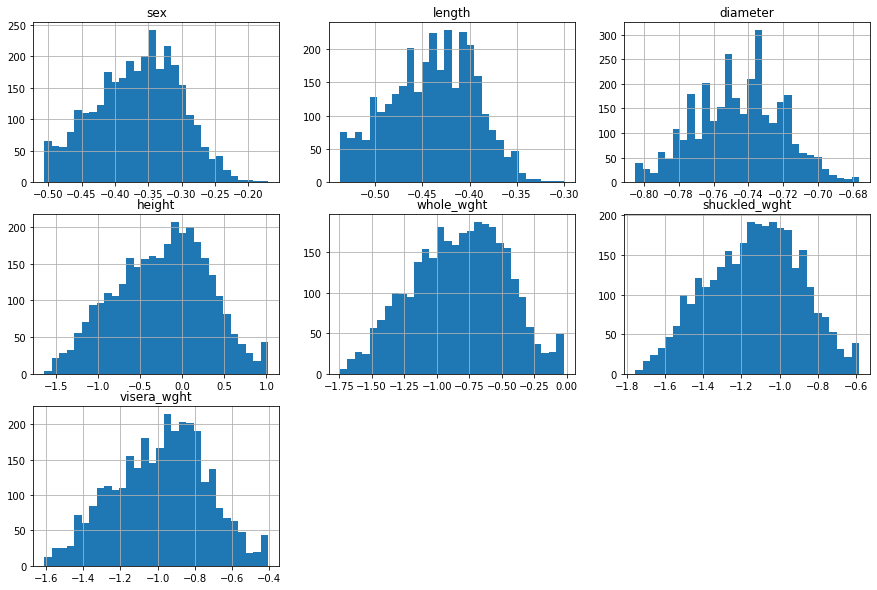

In [20]:
skew = ["length", "diameter", "height", "whole_wght", "shuckled_wght", "visera_wght", "shell_wght"]
plt.figure(figsize = (15, 10))

for i in range(1, len(skew)+1):
    plt.subplot(3,3,i)
    xtrain[skew[i-1]] = stats.boxcox(xtrain[skew[i-1]])[0]
    xtest[skew[i-1]] = stats.boxcox(xtest[skew[i-1]])[0]
    fig = xtrain[skew[i-1]].hist(bins = 30)
    fig.set_title(numerical[i-1])


In [21]:
# from sklearn.preprocessing import StandardScaler
# encoder = StandardScaler()
# xtrain = encoder.fit_transform(xtrain)
# xtest = encoder.fit_transform(xtest)

In [22]:
xtrain.head()

,sex,length,diameter,height,whole_wght,shuckled_wght,visera_wght,shell_wght
940,0.0,-0.408603,-0.474863,-0.768359,-0.637336,-1.067940,-1.306932,-1.175267
2688,2.0,-0.308880,-0.416335,-0.739653,0.026854,-0.524879,-1.083873,-1.071536
1948,2.0,-0.305536,-0.387952,-0.729625,0.219349,-0.566810,-0.879160,-0.770149
713,2.0,-0.456326,-0.506023,-0.780332,-1.034741,-1.384559,-1.438095,-1.317540
3743,1.0,-0.256291,-0.363605,-0.708980,0.665746,-0.311009,-0.684425,-0.544480


In [23]:
xtest.head()

,sex,length,diameter,height,whole_wght,shuckled_wght,visera_wght,shell_wght
668,2.0,-0.366574,-0.456820,-0.749574,-0.084055,-0.927667,-0.988287,-0.812914
1580,0.0,-0.396522,-0.470752,-0.773638,-0.424202,-0.958038,-1.202529,-1.064837
3784,2.0,-0.320880,-0.424242,-0.749574,0.242706,-0.542314,-0.762517,-0.841173
463,0.0,-0.520239,-0.572074,-0.814543,-1.433422,-1.629337,-1.678347,-1.561281
2615,2.0,-0.303513,-0.411755,-0.735337,0.464101,-0.356264,-0.760164,-0.746799


In [24]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()

In [25]:
# xtrain = scaler.fit_transform(xtrain)

In [26]:
# xtest = scaler.fit_transform(xtest)

In [27]:
ytrain = ytrain.astype("int")
ytest = ytest.astype("int")

In [28]:
from sklearn.ensemble import RandomForestRegressor

In [29]:
model = RandomForestRegressor(random_state=1234)

In [30]:
model.fit(xtrain, ytrain)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=1234, verbose=0, warm_start=False)

In [31]:
y_pred = model.predict(xtest)

In [36]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(ytest, y_pred)

In [37]:
mse ** 0.5

1.8704278353043562